# Different normalization processes:

In [8]:
### All the packages we need:
%matplotlib inline
%load_ext rpy2.ipython

from Reader import Reader
from Randomforest import RandomForest_Autotunner,plot_matrix,Measure,check_rotate
from Traj_creator import Traj_data

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os.path
import cPickle as pkl


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Code for files:
- H2B_ NORMALISED OR NOT (N or U) _ DIFF or not ( D or F(fraction)) or 0 or A all
Created files with orignal features $(X_t)_{t \in \textbf{N}}$ for a certain trajectory:
- H2B_U (or H2B_U_F_0) : $v_t=X_t$
- H2B_N_F_0 $v_t=\frac{X_t}{X_0}$
- H2B_N_F_A $v_t=\frac{X_t}{\bar{X}}$
- H2B_N_D_0 $v_t=X_t-X_0$
- H2B_N_D_A $v_t=X_t-\bar{X}$ (Like in panel data)

In [9]:
num_str="0015"  ## Well name

In [10]:
## Well name

if os.path.isfile("H2B_U_F_0.csv"):
    print "The file existed so I loaded it."
    H2B_U_F_0 = Traj_data(file_name="H2B_U_F_0.csv")#,pkl_traj_file="/home/pubuntu/Documents/InternWork2/Pkl_file") 
    H2B_U_F_0.caract="Unnormalized"

else:    
    H2B_U_F_0=Traj_data() 

    H2B_U_F_0.extracting(num_str,"both_channels_0015.hdf5",'primary') 
    ## Extracting the hdf5 file for the primary channel (H2b)

    H2B_U_F_0.Add_traj(normalize=False,all_traj=False,average=False,diff=False)## ,num_traj=10) ## (you can reduce the number of traj)
    ## Adding Alice's work on tracking to have trajectories

    file_loc="0015_PCNA.xml"

    H2B_U_F_0.label_finder(file_loc) 
    ## Finding associated labels by minimizing distance by click and distance of cell

    H2B_U_F_0.renaming_and_merge() 
    ## renaming the labels to have G1=="1", S=="S", G2=="2" and M=="M" 
    #This procedure may take a long time.
    H2B_U_F_0.caract="Unnormalized"
    H2B_U_F_0.data.to_csv('H2B_U_F_0.csv',index=False,header=True)    

The file existed so I loaded it.
Traj_data built
Reader constructed
Updated member Group_of_traj


In [11]:
## Well name

if os.path.isfile("H2B_N_F_0.csv"):
    print "The file existed so I loaded it."
    H2B_N_F_0 = Traj_data(file_name="H2B_N_F_0.csv")#,pkl_traj_file="/home/pubuntu/Documents/InternWork2/Pkl_file") 
    H2B_N_F_0.caract="Normalized by divided by first element"
else:    
    H2B_N_F_0=Traj_data() 

    H2B_N_F_0.extracting(num_str,"both_channels_0015.hdf5",'primary') 
    ## Extracting the hdf5 file for the primary channel (H2b)
    
    H2B_N_.add_error() ## We had it so that the data won't have to do 0/0

    H2B_N_F_0.Add_traj(normalize=True,all_traj=False,average=False,diff=False)## ,num_traj=10) ## (you can reduce the number of traj)
    ## Adding Alice's work on tracking to have trajectories

    file_loc="0015_PCNA.xml"

    H2B_N_F_0.label_finder(file_loc) 
    ## Finding associated labels by minimizing distance by click and distance of cell

    H2B_N_F_0.renaming_and_merge() 
    ## renaming the labels to have G1=="1", S=="S", G2=="2" and M=="M" 
    #This procedure may take a long time.
    H2B_N_F_0.caract="Normalized by divided by first element"

    H2B_N_F_0.data.to_csv('H2B_N_F_0.csv',index=False,header=True)    

The file existed so I loaded it.
Traj_data built
Reader constructed
Updated member Group_of_traj


In [12]:
## Well name

if os.path.isfile("H2B_N_D_0.csv"):
    print "The file existed so I loaded it."
    H2B_N_D_0 = Traj_data(file_name="H2B_N_D_0.csv")#,pkl_traj_file="/home/pubuntu/Documents/InternWork2/Pkl_file") 
    H2B_N_D_0.caract="Normalized by subtracted by first element"

else:    
    H2B_N_D_0=Traj_data()#(pkl_traj_file="/home/pubuntu/Documents/InternWork2/Pkl_file") 

    H2B_N_D_0.extracting(num_str,"both_channels_0015.hdf5",'primary') 
    ## Extracting the hdf5 file for the primary channel (H2b)
    
#    H2B_N_.add_error() ## We had it so that the data won't have to do 0/0

    H2B_N_D_0.Add_traj(normalize=True,all_traj=False,average=False,diff=True)## ,num_traj=10) ## (you can reduce the number of traj)
    ## Adding Alice's work on tracking to have trajectories

    file_loc="0015_PCNA.xml"

    H2B_N_D_0.label_finder(file_loc) 
    ## Finding associated labels by minimizing distance by click and distance of cell

    H2B_N_D_0.renaming_and_merge() 
    ## renaming the labels to have G1=="1", S=="S", G2=="2" and M=="M" 
    #This procedure may take a long time.
    H2B_N_D_0.caract="Normalized by subtracted by first element"

    H2B_N_D_0.data.to_csv('H2B_N_D_0.csv',index=False,header=True)    

The file existed so I loaded it.
Traj_data built
Reader constructed
Updated member Group_of_traj


In [13]:
## Well name

if os.path.isfile("H2B_N_D_A.csv"):
    print "The file existed so I loaded it."
    H2B_N_D_A = Traj_data(file_name="H2B_N_D_A.csv")#,pkl_traj_file="/home/pubuntu/Documents/InternWork2/Pkl_file") 
    H2B_N_D_A.caract="Normalized by subtracted by average"

else:    
    H2B_N_D_A=Traj_data()#(pkl_traj_file="/home/pubuntu/Documents/InternWork2/Pkl_file") 

    H2B_N_D_A.extracting(num_str,"both_channels_0015.hdf5",'primary') 
    ## Extracting the hdf5 file for the primary channel (H2b)
    
#    H2B_N_D_A.add_error() ## We had it so that the data won't have to do 0/0

    H2B_N_D_A.Add_traj(normalize=True,all_traj=True,average=True,diff=True)## ,num_traj=10) ## (you can reduce the number of traj)
    ## Adding Alice's work on tracking to have trajectories

    file_loc="0015_PCNA.xml"

    H2B_N_D_A.label_finder(file_loc) 
    ## Finding associated labels by minimizing distance by click and distance of cell

    H2B_N_D_A.renaming_and_merge() 
    ## renaming the labels to have G1=="1", S=="S", G2=="2" and M=="M" 
    #This procedure may take a long time.
    H2B_N_D_A.caract="Normalized by subtracted by average"
    
    H2B_N_D_A.data.to_csv('H2B_N_D_A.csv',index=False,header=True)    

The file existed so I loaded it.
Traj_data built
Reader constructed
Updated member Group_of_traj


In [14]:
## Well name

if os.path.isfile("H2B_N_F_A.csv"):
    print "The file existed so I loaded it."
    H2B_N_F_A = Traj_data(file_name="H2B_N_F_A.csv")#,pkl_traj_file="/home/pubuntu/Documents/InternWork2/Pkl_file") 
    H2B_N_F_A.caract="Normalized by dividing by average"
else:    
    H2B_N_F_A=Traj_data()#(pkl_traj_file="/home/pubuntu/Documents/InternWork2/Pkl_file") 

    H2B_N_F_A.extracting(num_str,"both_channels_0015.hdf5",'primary') 
    ## Extracting the hdf5 file for the primary channel (H2b)
    
#    H2B_N_F_A.add_error() ## We had it so that the data won't have to do 0/0

    H2B_N_F_A.Add_traj(normalize=True,all_traj=True,average=True,diff=False)## ,num_traj=10) ## (you can reduce the number of traj)
    ## Adding Alice's work on tracking to have trajectories

    file_loc="0015_PCNA.xml"

    H2B_N_F_A.label_finder(file_loc) 
    ## Finding associated labels by minimizing distance by click and distance of cell

    H2B_N_F_A.renaming_and_merge() 
    ## renaming the labels to have G1=="1", S=="S", G2=="2" and M=="M" 
    #This procedure may take a long time.
    H2B_N_F_A.caract="Normalized by dividing by average"

    H2B_N_F_A.data.to_csv('H2B_N_F_A.csv',index=False,header=True)    

The file existed so I loaded it.
Traj_data built
Reader constructed
Updated member Group_of_traj


In [15]:
_rand_index_train=(random.sample(H2B_N_D_0.train.index,5))
_rand_col  = random.sample(H2B_N_D_0.names,5)
traj=0
obj=H2B_N_D_0
obj.data.ix[obj.data["traj"]==traj,_rand_col+[num_str+"_id_frame"]].head()

,eccentricity,h4_PRO,moment_I7,ls0_IRGL_sample_sd,h8_IDM,0015_id_frame
400,0.000000,0.000000,0.000000e+00,0.000000,0.000000,5
473,-0.177407,-93.655464,8.486831e-11,-1.163006,0.091141,6
546,-0.199939,-94.510577,9.942752e-11,-1.321847,0.107559,7
620,-0.218382,-94.582221,8.717339e-11,-1.479240,0.193974,8
694,-0.112884,-95.694828,9.936784e-11,-1.439551,0.374867,9


In [16]:
obj=H2B_N_D_A
obj.data.ix[obj.data["traj"]==traj,_rand_col+[num_str+"_id_frame"]].head()

,eccentricity,h4_PRO,moment_I7,ls0_IRGL_sample_sd,h8_IDM,0015_id_frame
0,-0.096663,-29.861133,-1.953515e-08,-1.187466,0.053088,0
71,-0.107421,-29.861133,-1.953518e-08,-0.728371,0.053088,1
140,-0.105367,-29.861133,-1.953396e-08,-0.874071,0.053088,2
211,-0.096260,-29.861133,-1.953535e-08,-1.078722,0.053088,3
283,-0.080081,-29.861133,-1.953536e-08,0.180591,0.053088,4


In [17]:
obj=H2B_N_D_0
obj.data.ix[obj.data["traj"]==traj,_rand_col+[num_str+"_id_frame"]].head()

,eccentricity,h4_PRO,moment_I7,ls0_IRGL_sample_sd,h8_IDM,0015_id_frame
400,0.000000,0.000000,0.000000e+00,0.000000,0.000000,5
473,-0.177407,-93.655464,8.486831e-11,-1.163006,0.091141,6
546,-0.199939,-94.510577,9.942752e-11,-1.321847,0.107559,7
620,-0.218382,-94.582221,8.717339e-11,-1.479240,0.193974,8
694,-0.112884,-95.694828,9.936784e-11,-1.439551,0.374867,9


In [18]:
obj=H2B_N_F_0
obj.data.ix[obj.data["traj"]==traj,_rand_col+[num_str+"_id_frame"]].head()

,eccentricity,h4_PRO,moment_I7,ls0_IRGL_sample_sd,h8_IDM,0015_id_frame
400,1.000000,1.000000,1,1.000000,1.000000,5
473,0.384718,0.022092,1,0.853150,1.153310,6
546,0.306573,0.013163,1,0.833093,1.180927,7
620,0.242608,0.012415,1,0.813220,1.326287,8
694,0.608495,0.000798,1,0.818231,1.630571,9


In [19]:
obj=H2B_N_F_A
obj.data.ix[obj.data["traj"]==traj,_rand_col+[num_str+"_id_frame"]].head()

,eccentricity,h4_PRO,moment_I7,ls0_IRGL_sample_sd,h8_IDM,0015_id_frame
0,0.511203,0,-0.000002,0.826857,1.056064,0
71,0.456802,0,-0.000004,0.893797,1.056064,1
140,0.467191,0,0.000059,0.872553,1.056064,2
211,0.513242,0,-0.000012,0.842713,1.056064,3
283,0.595051,0,-0.000013,1.026332,1.056064,4


In [20]:
obj=H2B_U_F_0
obj.data.ix[obj.data["traj"]==traj,_rand_col+[num_str+"_id_frame"]].head()

,eccentricity,h4_PRO,moment_I7,ls0_IRGL_sample_sd,h8_IDM,0015_id_frame
400,0.288335,95.771208,-8.723894e-11,7.919675,0.594488,5
473,0.110928,2.115744,-2.370632e-12,6.756669,0.685629,6
546,0.088396,1.260631,1.218859e-11,6.597828,0.702047,7
620,0.069952,1.188987,-6.555005e-14,6.440435,0.788462,8
694,0.175450,0.076380,1.212890e-11,6.480124,0.969355,9


Processing time: 49.780808 in sec


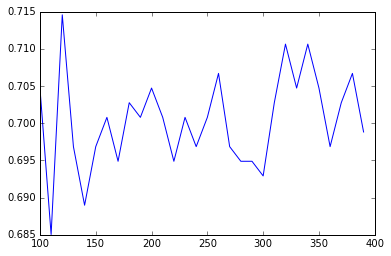

Processing time: 119.554158 in sec


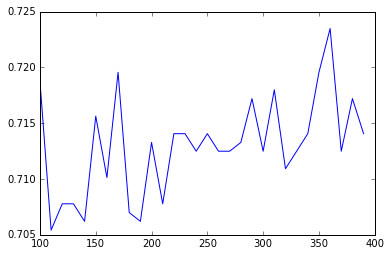

Processing time: 52.189118 in sec


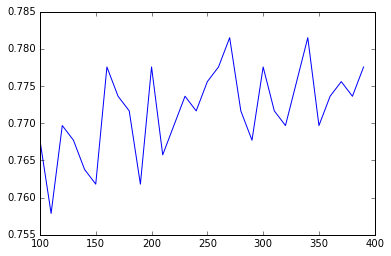

Processing time: 124.897817 in sec


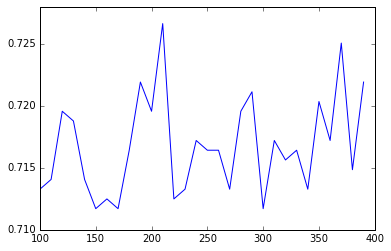

Processing time: 53.948489 in sec


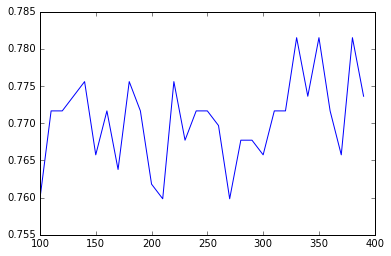

In [38]:
list_obj=[ H2B_U_F_0, H2B_N_F_A, H2B_N_F_0, H2B_N_D_A, H2B_N_D_0]
kfold=3
D={}
instances_to_keep=pd.notnull(H2B_N_F_A.train.traj)
for obj in list_obj:
    if obj.Var_missing[0] in obj.train.columns:
        obj.missing_features_train()
    if obj.Var_missing[0] in obj.data.columns:
        obj.missing_features_data()
        
    instances_to_keep=pd.notnull(obj.train.traj)

    values=[100 + i*10 for i in range(30)]

    model=RandomForest_Autotunner(values)

    model.tunning(obj.train.ix[instances_to_keep,obj.names],obj.train.ix[instances_to_keep,"Type"],kfold,plot=False,fit_new_model=False)
    plt.show()

    i_=np.argmax(model.MSE)
    n_tree=values[i_]
 ##   print "For this caracteristic: "+obj.caract +", with n= "+ str(sum(instances_to_keep)) +"\n"
 ##   print "We now have a classifier with n=%d, with an expected accuracy of %5.3f for the normalized data. \n" %(n_tree,max(model.MSE))
 ##   plot_matrix(model.cm,title="Confusion matrix unnormalized with normalized data")
 ##   plt.show()
    model.cm_normalized = model.cm.astype('float') / model.cm.sum(axis=1)[:, np.newaxis]
 ##   plot_matrix(model.cm_normalized,title="Confusion matrix normalized with normalized data")
 ##   plt.show()
    D[obj.caract]={"tree_tunning":n_tree,
                   "best accuracy":max(model.MSE),
                   "Accuracy vector":model.MSE,
                   "Confusion matrix":model.cm,
                   "Normalized confusion matrix":model.cm_normalized,
                   "Training sample":str(sum(instances_to_keep))
                  }

In [ ]:
i_=np.argmax(model.MSE)
    n_tree=values[i_]
    print "For this caracteristic: "+obj.caract +", with n= "+ str(sum(instances_to_keep)) +"\n"
    print "We now have a classifier with n=%d, with an expected accuracy of %5.3f for the normalized data. \n" %(n_tree,max(model.MSE))
    plot_matrix(model.cm,title="Confusion matrix unnormalized with normalized data")
    plt.show()
    model.cm_normalized = model.cm.astype('float') / model.cm.sum(axis=1)[:, np.newaxis]
    plot_matrix(model.cm_normalized,title="Confusion matrix normalized with normalized data")
    plt.show()
    D[obj.caract]={"tree_tunning":n_tree,
                   "best accuracy":max(model.MSE),
                   "Accuracy vector":model.MSE,
                   "Confusion matrix":model.cm,
                   "Normalized confusion matrix":model.cm_normalized
                  }

In [40]:
for ke in D.keys():
    tmp_dict=D[ke]
    print "Normalization process: "+ke 
    print "Accuracy score: #####    "+str(tmp_dict["best accuracy"])+"   #####"
    print "Effectif number: ####    "+str(tmp_dict["Training sample"])+" \n"

Normalization process: Normalized by divided by first element
Accuracy score: #####    0.781496062992   #####
Effectif number: ####    508 

Normalization process: Normalized by dividing by average
Accuracy score: #####    0.723487824038   #####
Effectif number: ####    1273 

Normalization process: Normalized by subtracted by average
Accuracy score: #####    0.726630007855   #####
Effectif number: ####    1273 

Normalization process: Unnormalized
Accuracy score: #####    0.714566929134   #####
Effectif number: ####    508 

Normalization process: Normalized by subtracted by first element
Accuracy score: #####    0.781496062992   #####
Effectif number: ####    508 



In [39]:
print tmp_dict.keys()
tmp_dict["best accuracy"]

['best accuracy', 'tree_tunning', 'Accuracy vector', 'Normalized confusion matrix', 'Confusion matrix']


0.77952755905511806